# Ejercicio de Matriz de Transformación Homogénea #


Solución al ejercicio propuesto en clase de Matriz de transformación Homogénea

La imagen de la figura representa un sencillo brazo manipulador con 3 grados de libertad que trabaja en el plano xy.<br>
<img src="img/actividad1_fig1.png" width="400"><br>
Si se sabe que la posición del objeto es [20, 0] con respecto al marco de referencia del actuador final **ee**. ¿cuáles son sus coordenadas respecto de al marco de referencia de la **base** del robot?

Para resolver este problema lo primero que tenemos que analizar el la matriz de transformación homogénea que nos transforme de la base al actuador final. es decir:

$ ^{base} P =  \left( ^{base} \xi_{j_{1}} \oplus  ^{j_{1}} \xi_{j_{2}} \oplus  ^{j_{2}} \xi_{ee} \right)  \bullet  ^{ee}P$

La matriz de transformación homogénea que define $ ^{base} \xi_{j1}$ esta dada por: 

$ ^{base} \xi_{j1} = \begin{bmatrix}
\cos \left( \theta \right) \ & - \sin \left( \theta \right) & T_{x}\\
\sin \left( \theta \right) \ & \cos \left( \theta \right) & T_{y}\\
0 & 0 & 1
\end{bmatrix}$ 

donde ahora hay que calcular los valores para $\theta$ y el vector de traslación $ \vec{T}$.

<br>
<img src="img\actividad1_fig1_base_j1.png" width="400"><br>

Observando la imagen anterior, observamos que el vector de desplazamiento va lo largo de la longitud del brazo con la une base y j1, por lo tanto podemos definir el vector como:

$\vec{T} = 100 \cos(120^{\circ}) + 100 \sin(120^{\circ})$

En cuanto a la rotación, en la figura anterior podemos observar que si trasladamos un marco de referencia nuevo, que tenga la posición del marco de referencia j1, pero que este tenga la misma rotación que el marco de referencia de la base, es mas fácil notar cuanto es el angulo de rotación, el cual es de $ 120^{\circ} - 90^{\circ} = 30 ^{\circ}$ y por lo tanto con estos valores podemos construir la matriz como:

$ ^{base} \xi_{j1} = \begin{bmatrix}
\cos \left( 30 ^{\circ} \right)  & - \sin \left( 30 ^{\circ} \right) & 100 \cos(120^{\circ})\\
\sin \left( 30 ^{\circ} \right)  &   \cos \left( 30 ^{\circ} \right) & 100 \sin(120^{\circ}) \\
0 & 0 & 1
\end{bmatrix}$ 

A la par de la solución del problema, vamos a ir escribiendo el código necesario para resolver el problema en el lenguaje de programación de python. Primero necesitamos importar los módulos necesarios, en este caso van a ser dos, el módulo **numpy**, por medio del cual vamos a definir las matrices como arreglos, ademas de contar con funciones funciones trigonométricas y con funciones de multiplicación de matrices. El segundo módulo a utilizar es **pyplot** incluido en el paquete de **matplotlib**, el cual nos va ayudar a ver en una gráfica los punto necesarios.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 


ahora para cilitar la elavoración de las matrices, vamos a crear una función que nos devuelva una matriz de trasformación homogénea en 2 dimensiones, la cual recibirá como argumento el angulo **theta** de la rotación, el los puntos **$T_{x}$** y **$T_{y}$** de la traslación

In [2]:
def matTransHom2D(Theta, Tx, Ty):
    return np.array([[np.cos(Theta), -np.sin(Theta), Tx],
                     [np.sin(Theta), np.cos(Theta), Ty],
                     [0, 0, 1]])



Ahora que tenemos la función vamos a emplearla para definir la primer matriz de transformación que ya definimos es decir $^{base} \xi_{j1}$, es importante resaltar que el módulo numpy, utilizas los ángulos en radianes, por lo que habrá que hacer la conversión, recordando que radianes son:


$ angulo_{radian} = \frac{ \pi * angulo_{grados}  }{180}$

In [3]:
theta = 30*np.pi/180
tx = 100*np.cos(120*np.pi/180)
ty = 100*np.sin(120*np.pi/180)
b_Xi_j1 = matTransHom2D(theta,tx ,ty)
print(b_Xi_j1)

[[  0.8660254   -0.5        -50.        ]
 [  0.5          0.8660254   86.60254038]
 [  0.           0.           1.        ]]


Ya que tenemos la primer matriz de transformación, ahora sigue definir la que corresponde a $ ^{j1} \xi_{j2}$

<br><img src="img/actividad1_fig1_j1_j2.png" width="400"><br>

Si nos centramos solamente en la imagen que nos muestra las posiciones de estas dos uniones, es fácil observar que el ángulo de rotación es 0 y que **j2** solamente esta traslado sobre el eje de las X1 en 100 unidades con relación a **j1** por lo tanto la matriz de transformación nos queda como:

$ ^{j1} \xi_{j2} = \begin{bmatrix}
\cos \left( 0 \right)  & - \sin \left(0 \right) & 100 \\
\sin \left( 0 \right)  &   \cos \left( 0 \right) & 0 \\
0 & 0 & 1
\end{bmatrix}$ 

Ya que tenemos los puntos el angulo y la traslación vamos a volver a utilizar la función creada anteriormente para generar la nueva matriz de transformación

In [4]:
theta = 0*np.pi/180
tx = 100
ty = 0
j1_Xi_j2 = matTransHom2D(theta,tx,ty)
print(j1_Xi_j2)


[[  1.  -0. 100.]
 [  0.   1.   0.]
 [  0.   0.   1.]]


Ahora vamos a definir la transformación que va de la **base** a **j1**, es decir:

$^{base} \xi_{j2} = ^{base} \xi_{j_{1}} \oplus  ^{j_{1}} \xi_{j_{2}} $

Lo cual se realiza multiplicando la matriz de transformación que corresponde a $^{base} \xi_{j_{1}}$ con la matriz de transformación de  $^{j_{1}} \xi_{j_{2}}$.
En python esto es muy fácil ya que la clase **array** que usamos en la definición de la matrices, 
tiene un método llamando **dot()**, 
el cual realiza la multiplicación de esa matriz, 
con otra que se ponga dentro de los paréntesis. 
Por lo tanto podemos definir la transformación $^{base} \xi_{j2}$ como:

In [5]:
b_Xi_j2 = b_Xi_j1.dot(j1_Xi_j2)
print(b_Xi_j2)

[[  0.8660254   -0.5         36.60254038]
 [  0.5          0.8660254  136.60254038]
 [  0.           0.           1.        ]]


Donde podemos observar que los valores mostrados corresponden a los elementos de la matriz anterior,
para verificar que los valores calculador corresponden vamos a graficar los puntos obtenidos, 
primero marcaremos en la gráfica el punto de la base

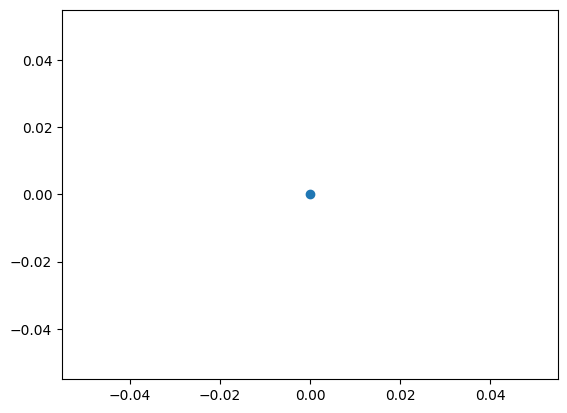

In [6]:
plt.plot(0,0,'o')

Ahora incluiremos los puntos obtenidos para **j1**

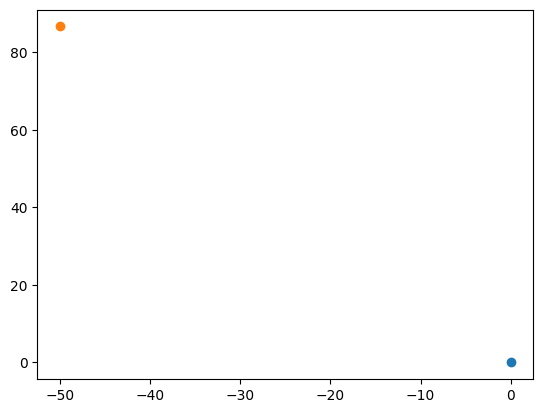

In [7]:
plt.plot(0,0,'o')
plt.plot(b_Xi_j1[0,2],b_Xi_j1[1,2],'o')

Despues pondemos una linea que conecte al punto de la **base** con el punto de **j1**

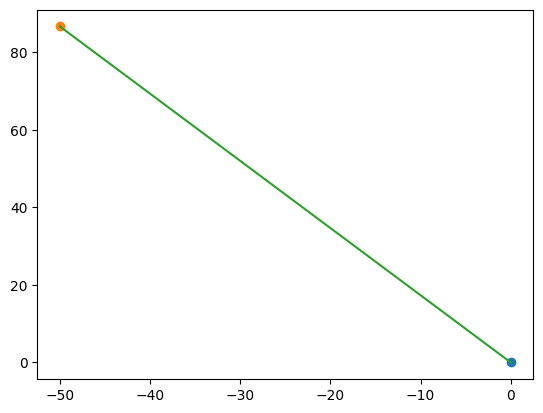

In [8]:
plt.plot(0,0,'o')
plt.plot(b_Xi_j1[0,2],b_Xi_j1[1,2],'o')
plt.plot([0,b_Xi_j1[0,2]],[0,b_Xi_j1[1,2]])

Ahora para darle mas forma, vamos a incluir el punto correspondiente a **j2**,
es importante tomar en cuenta que la traslación del punto se debe de tomar de la referencia de $^{base} \xi_{j2}$, 
ya que la referencia de la gráfica, 
es la correspondiente a la **base**, 
y si se tomaran la traslación en la matriz de $^{j1} \xi_{j2}$, 
las coordenadas serian incorrectas.
Por lo tanto podemos verificar que nuestra matriz de transformación $^{base} \xi_{j2}$ es correcta si incluimos los puntos y trazamos la linea que los conecta. 

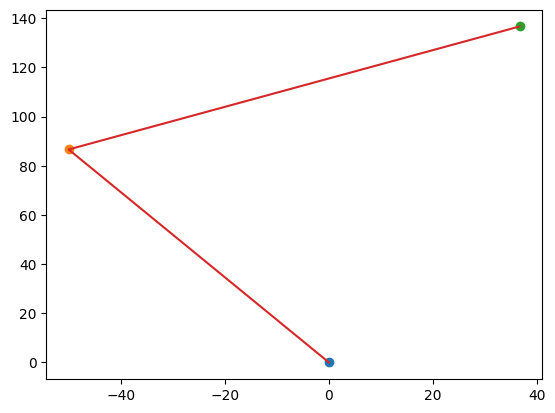

In [9]:
plt.plot(0,0,'o')
plt.plot(b_Xi_j1[0,2],b_Xi_j1[1,2],'o')
plt.plot(b_Xi_j2[0,2],b_Xi_j2[1,2],'o')
plt.plot([0,b_Xi_j1[0,2],b_Xi_j2[0,2]],[0,b_Xi_j1[1,2],b_Xi_j2[1,2]])

Por ultimo vamos a definir la última matriz de transformación, 
la cual corresponde a $^{j2} \xi_{ee}$ y es igual a:

$^{j2} \xi_{ee} = \begin{bmatrix}
\cos \left( -45 \right)  & - \sin \left( -45 \right) & 50 \cos \left( -45 \right) \\
\sin \left( -45 \right)  &   \cos \left( -45 \right) & 50 \sin \left( -45 \right) \\
0 & 0 & 1
\end{bmatrix}$

<br><img src="img/actividad1_fig1_j2_ee.png" width="400"><br>

In [10]:
theta = -45*np.pi/180
tx = 50*np.cos(-45*np.pi/180)
ty = 50*np.sin(-45*np.pi/180)
j2_Xi_ee = matTransHom2D(theta, tx,ty)
print(j2_Xi_ee)

[[  0.70710678   0.70710678  35.35533906]
 [ -0.70710678   0.70710678 -35.35533906]
 [  0.           0.           1.        ]]


Ahora calculamos la matriz de transformación que corresponde a la **base** con el actuador final **ee** es decir:

 $^{base} \xi_{ee} = ^{base} \xi_{j_{1}} \oplus  ^{j_{1}} \xi_{j_{2}} \oplus  ^{j_{2}} \xi_{ee} $

para lo cual vamos a utilizar la matriz que define transformación de $^{base} \xi_{j2}$,
la cual se va a multiplicar por la transformación calculada de $^{j2} \xi_{ee}$

In [11]:
b_Xi_ee = b_Xi_j2.dot(j2_Xi_ee)
print(b_Xi_ee)

[[  0.96592583   0.25881905  84.89883169]
 [ -0.25881905   0.96592583 123.66158812]
 [  0.           0.           1.        ]]


Ahora que ya tenemos la trasformación de **base** a **ee**,
se puede obtener las coordenadas del punto **P** desde el marco de referencia de la **base**,
es decir $ ^{base} P$,
el cual es igual al producto de la transformación $^{base} \xi_{ee} ^{ee}P$.
Donde el punto $^{ee}P$, 
corresponde al vector de:
 

$^{ee}P = \begin{bmatrix}
20  \\
0 \\
1
\end{bmatrix}$

y por lo tanto $^{base}P$ es igual a:

$^{ee}P =\begin{bmatrix}
0.9659 & 0.2588 & 84.89  \\
-0.2588 & 0.9659 & 123.66 \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
20  \\
0 \\
1
\end{bmatrix}$

Primero definiremos el vector correspondiente al punto $^{ee}P$,
con la ayuda de las clases **array** de numpy

In [12]:
eeP = np.array([[20],
                [0],
                [1]])
print(eeP)

[[20]
 [ 0]
 [ 1]]


Ahora realizaremos el producto $^{base} \xi_{ee} ^{ee}P$

In [13]:
b_P = b_Xi_ee.dot(eeP)
print(b_P)

[[104.21734822]
 [118.48520722]
 [  1.        ]]


Por lo tanto las coordenadas del punto vistos desde la base son $\left( 104.21, 118.48 \right)$.
Para comprobar que el resultado sea correcto graficamos todos los puntos y marcamos con el signo **+**, 
el punto correspondiente al objeto.

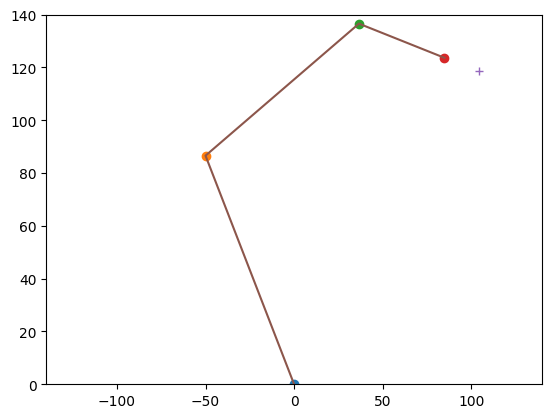

In [14]:
fig, axes = plt.subplots()
plt.plot(0,0,'o')
plt.plot(b_Xi_j1[0,2],b_Xi_j1[1,2],'o')
plt.plot(b_Xi_j2[0,2],b_Xi_j2[1,2],'o')
plt.plot(b_Xi_ee[0,2],b_Xi_ee[1,2],'o')
plt.plot(b_P[0,0],b_P[1,0],'+')

plt.plot([0,b_Xi_j1[0,2],b_Xi_j2[0,2],b_Xi_ee[0,2]],[0,b_Xi_j1[1,2],b_Xi_j2[1,2],b_Xi_ee[1,2]])

axes.set_xlim(-140,140)
axes.set_ylim(0 , 140)
plt.show()

Donde podemos observar que la imagen generada corresponde de forma muy similar a la figura mostrada por el ejemplo.

Ahora resuelve el siguiente ejercicio: \\
La imagen de la figura representa un sencillo brazo manipulador con 3 grados de libertad que trabaja en el plano xy.<br>
<img src="img/actividad1_fig2.png" width="400"><br>
Si se sabe que la posición del objeto es [20, 10] con respecto al marco de referencia del actuador final **ee**. ¿cuáles son sus coordenadas respecto de al barco de referencia de la **base** del robot?

figura de ejercicio inicial y de ejercicio encargado así como el ejercicio, fue tomado del canal de YouTuBe https://www.youtube.com/channel/UCTXsT30VF8S9XphEOjUYHrg. La solución, códigos, recortes y gráficas de imágenes fueron creadas por mi, Ing. Gustavo David Mendoza Pinto.